In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# generate data
mean = (1, 2)
cov = [[1, 0.9], [0.9, 1]]
data = np.random.multivariate_normal(mean, cov,100)
X = np.hstack([np.ones(len(data))[:,np.newaxis],data[:,0, np.newaxis]])
y = data[:,1]

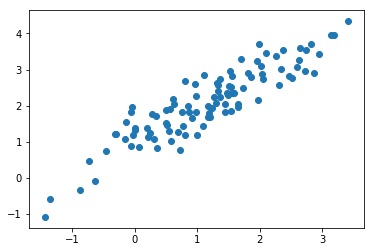

In [4]:
# visualize data
plt.scatter(X[:,1],y);

In [5]:
# define prior distribution
w0 = [0,0]
V0 = np.eye(2)

In [6]:
# define posterior parameters
Vn = np.linalg.inv(X.T@X+np.linalg.inv(V0))
wn = Vn@(np.linalg.inv(V0)@w0+X.T@y)

In [7]:
# draw samples from the posterior distribution
w_samples = np.random.multivariate_normal(wn, Vn,200)

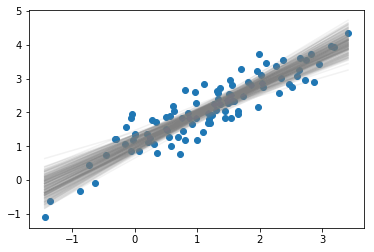

In [8]:
# plot results
plt.scatter(X[:,1],y)
x_plot = np.linspace(np.min(X[:,1]),np.max(X[:,1]))
X_plot = np.hstack([np.ones(len(x_plot))[:,np.newaxis],x_plot[:,np.newaxis]])
for w in w_samples:
    plt.plot(x_plot, X_plot@w, c='gray', alpha=0.1)